Extract statistical features from acc data

In [1]:
import pickle as pk
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, stats
import pickle
from tqdm import tqdm
from multiprocessing import Pool

In [2]:
# load preprocessed data 
with open("output/alldata_info.pickle", "rb") as fname:(df2save) = pk.load(fname)
df2save['fname_accl'] = df2save['fname_accl'].str.replace("_desc","") # fix strings (corrected bug in fname_save_strn - may remove in future downloaded files)

There are 39.92506244796004% of nominal cases


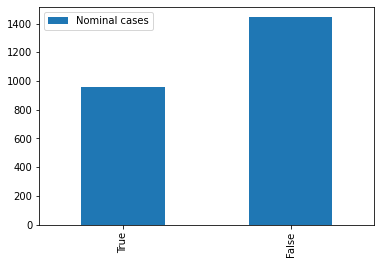

In [3]:
df2save['target'] = (df2save['case'] == 'A') | (df2save['case'] == 'B') | (df2save['case'] == 'C') | (df2save['case'] == 'R')
df2save['target'].value_counts().sort_values().plot(kind='bar')
plt.legend({'Nominal cases'})

print('There are ' + str(df2save['target'].sum()/len(df2save['target'])*100) + '% of nominal cases')

In [4]:
df2save

,accl_desc,case,exgn_desc,fname_accl,fname_exgn,fname_hdty,fname_strn,hdty_desc,ndata,rlzt,sens,sgnl,strn_desc,temp,target
0,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",R,force,output/R_+40_2_white_noise_16_216580_accl.csv,output/R_+40_2_white_noise_16_216580_exgn_desc...,output/R_+40_2_white_noise_16_216580_hdty_desc...,output/R_+40_2_white_noise_16_216580_strn_desc...,"[K7861_H, K7862_H, K7861_T, K7862_T]",216580.0,16,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+40,True
1,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",R,force,output/R_+40_2_white_noise_5_211582_accl.csv,output/R_+40_2_white_noise_5_211582_exgn_desc.csv,output/R_+40_2_white_noise_5_211582_hdty_desc.csv,output/R_+40_2_white_noise_5_211582_strn_desc.csv,"[K7861_H, K7862_H, K7861_T, K7862_T]",211582.0,5,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+40,True
2,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",R,force,output/R_+40_2_white_noise_19_211582_accl.csv,output/R_+40_2_white_noise_19_211582_exgn_desc...,output/R_+40_2_white_noise_19_211582_hdty_desc...,output/R_+40_2_white_noise_19_211582_strn_desc...,"[K7861_H, K7862_H, K7861_T, K7862_T]",211582.0,19,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+40,True
3,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",R,force,output/R_+40_2_white_noise_6_211582_accl.csv,output/R_+40_2_white_noise_6_211582_exgn_desc.csv,output/R_+40_2_white_noise_6_211582_hdty_desc.csv,output/R_+40_2_white_noise_6_211582_strn_desc.csv,"[K7861_H, K7862_H, K7861_T, K7862_T]",211582.0,6,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+40,True
4,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",R,force,output/R_+40_2_white_noise_11_211582_accl.csv,output/R_+40_2_white_noise_11_211582_exgn_desc...,output/R_+40_2_white_noise_11_211582_hdty_desc...,output/R_+40_2_white_noise_11_211582_strn_desc...,"[K7861_H, K7862_H, K7861_T, K7862_T]",211582.0,11,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",F,force,output/F_+30_2_white_noise_1_214914_accl.csv,output/F_+30_2_white_noise_1_214914_exgn_desc.csv,output/F_+30_2_white_noise_1_214914_hdty_desc.csv,output/F_+30_2_white_noise_1_214914_strn_desc.csv,"[K7861_H, K7862_H, K7861_T, K7862_T]",214914.0,1,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+30,False
2398,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",F,force,output/F_+30_2_white_noise_4_213248_accl.csv,output/F_+30_2_white_noise_4_213248_exgn_desc.csv,output/F_+30_2_white_noise_4_213248_hdty_desc.csv,output/F_+30_2_white_noise_4_213248_strn_desc.csv,"[K7861_H, K7862_H, K7861_T, K7862_T]",213248.0,4,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+30,False
2399,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",F,force,output/F_+30_2_white_noise_5.2_213248_accl.csv,output/F_+30_2_white_noise_5.2_213248_exgn_des...,output/F_+30_2_white_noise_5.2_213248_hdty_des...,output/F_+30_2_white_noise_5.2_213248_strn_des...,"[K7861_H, K7862_H, K7861_T, K7862_T]",213248.0,5.2,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+30,False
2400,"[Ch1, Ch2, Ch3, Ch4, Ch5, Ch6, Ch7, Ch8]",F,force,output/F_+30_2_white_noise_2_209916_accl.csv,output/F_+30_2_white_noise_2_209916_exgn_desc.csv,output/F_+30_2_white_noise_2_209916_hdty_desc.csv,output/F_+30_2_white_noise_2_209916_strn_desc.csv,"[K7861_H, K7862_H, K7861_T, K7862_T]",209916.0,2,2,white_noise,"[Strain_1, Strain_2, Strain_3_rosette_A, Strai...",+30,False


In [ ]:
ncases = len(df2save)

def get_feat(i):    
    # load data    
    accl = np.genfromtxt(df2save['fname_accl'][i], delimiter=',')
    ndata, nch = accl.shape
    
    describe = stats.describe(accl)
    X_vec = np.hstack((i, describe.minmax[0],describe.minmax[1],describe.mean,describe.variance,describe.skewness,describe.kurtosis))

    return X_vec

pool = Pool()                    # Create a multiprocessing Pool

#### RUN IN PARALLEL USING ALL CORES
# outputs = pool.map(get_feat,range(100))  # process data_inputs iterable with pool
outputs = list(tqdm(pool.imap_unordered(get_feat, range(ncases)), total=ncases))
# outputs = list(tqdm(pool.imap_unordered(get_feat, range(5)), total=5)) # debug

outputs = np.array(outputs) # convert to np.array
pool.close()
pool.join()


  0%|                                                                                         | 0/2402 [00:00<?, ?it/s]

In [ ]:
sorted_outputs = outputs[np.argsort(outputs[:, 0])]
# print(sorted_outputs[:,0],outputs[:,0])
# print(sorted_outputs[:,1],outputs[:,1]) # debug sort/unsort

In [ ]:
Xts = sorted_outputs[:,1:]
Xts.shape, sorted_outputs.shape

In [ ]:
# pickle data
with open('output/Tsdata.pickle', 'wb') as handle:
    pickle.dump([Xts], handle, protocol=pickle.HIGHEST_PROTOCOL)